Algoritmo de clasificación supervisada Knn

In [16]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics

In [17]:
# cargar los datos desde un archivo CSV
datos = pd.read_csv("./Datasets/Iris.csv")

In [18]:
# separar los datos en características y etiquetas
X = datos.drop('Species', axis=1)
y = datos['Species']

In [19]:
# dividir los datos en conjuntos de entrenamiento y prueba
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.3, random_state=19)
print(X_entrenamiento)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
111  112            6.4           2.7            5.3           1.9
43    44            5.0           3.5            1.6           0.6
136  137            6.3           3.4            5.6           2.4
20    21            5.4           3.4            1.7           0.2
47    48            4.6           3.2            1.4           0.2
..   ...            ...           ...            ...           ...
52    53            6.9           3.1            4.9           1.5
19    20            5.1           3.8            1.5           0.3
98    99            5.1           2.5            3.0           1.1
110  111            6.5           3.2            5.1           2.0
93    94            5.0           2.3            3.3           1.0

[105 rows x 5 columns]


In [20]:
# crear y entrenar un modelo KNN con k=9
modelo = KNeighborsClassifier(n_neighbors=2)
modelo.fit(X_entrenamiento, y_entrenamiento)

KNeighborsClassifier(n_neighbors=2)

In [21]:
# hacer predicciones en los datos de prueba
predicciones = modelo.predict(X_prueba)

In [22]:
# calcular la precisión del modelo
precision = accuracy_score(y_prueba, predicciones)

print("Precisión del modelo:", precision)

Precisión del modelo: 1.0


In [23]:
#generar la matriz confusión
#matriz_confusion = confusion_matrix(y_prueba, predicciones)
#print("Matriz de confusión:")
##print(matriz_confusion)

confusion_matrix = metrics.confusion_matrix(y_prueba, 
                                                predicciones)
confusion_matrix

array([[14,  0,  0],
       [ 0, 16,  0],
       [ 0,  0, 15]], dtype=int64)

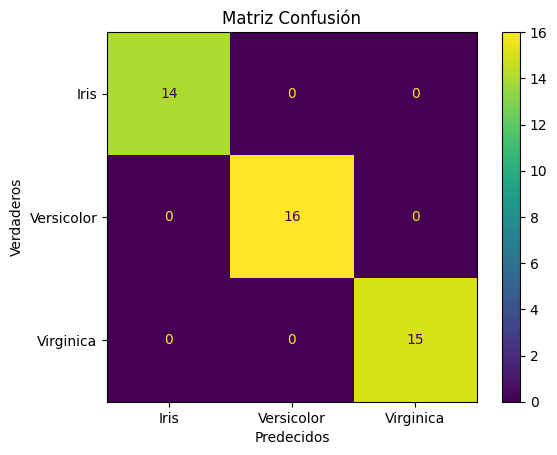

In [24]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Iris','Versicolor','Virginica'])

cm_display.plot()
plt.title("Matriz Confusión")
plt.xlabel("Predecidos")
plt.ylabel("Verdaderos")
plt.show()

In [25]:
#Obtener verdaderos de la matriz confusión
verdaderos = int(confusion_matrix[[0],[0]] + confusion_matrix[[1],[1]] + confusion_matrix[[2],[2]])
verdaderos

#Obtener falsos de la matriz confusión
falsos = int(confusion_matrix[[0],[1]] + confusion_matrix[[0],[2]] + confusion_matrix[[1],[0]] + confusion_matrix[[1],[2]] + confusion_matrix[[2],[0]] + confusion_matrix[[2],[1]])
falsos

exactitud = verdaderos / (verdaderos+falsos) * 100
print(f'El modelo tiene un porcentaje de exactitud de: {exactitud}%')

El modelo tiene un porcentaje de exactitud de: 100.0%


In [26]:
verdaderos_izq = int(confusion_matrix[[0],[0]])
falsos_izq = int(confusion_matrix[[0],[1]] + confusion_matrix[[0],[2]])
sensibilidad_izq = verdaderos_izq / (falsos_izq + verdaderos_izq) * 100

print(f'El modelo tiene un porcentaje de sensibilidad sobre Iris de: {sensibilidad_izq}%')

verdaderos_cent = int(confusion_matrix[[1],[1]])
falsos_cent = int(confusion_matrix[[1],[0]] + confusion_matrix[[1],[2]])
sensibilidad_cent = verdaderos_cent / (falsos_cent + verdaderos_cent) * 100

print(f'El modelo tiene un porcentaje de sensibilidad sobre Versicolor de: {sensibilidad_cent}%')

verdaderos_der = int(confusion_matrix[[2],[2]])
falsos_der = int(confusion_matrix[[2],[0]] + confusion_matrix[[2],[1]])
sensibilidad_der = verdaderos_der / (falsos_der + verdaderos_der) * 100

print(f'El modelo tiene un porcentaje de sensibilidad sobre Virginica de: {sensibilidad_der}%')

El modelo tiene un porcentaje de sensibilidad sobre Iris de: 100.0%
El modelo tiene un porcentaje de sensibilidad sobre Versicolor de: 100.0%
El modelo tiene un porcentaje de sensibilidad sobre Virginica de: 100.0%
